# Proyecto – Detección de Comunidades

Esta guía proporciona una estructura para el estudio del análisis de comunidades en redes.


* Asignatura: Base de datos 3
* Profesor: Ana Aguilera Faraco
* Ayudante: Fernanda Fuentes
* Fecha: 7 de noviembre del 2025

**Integrantes**


* Dante Chavez  dante.chavez@estudiantes.uv.cl
* Nikolas Lagos  nikolas.lagos@estudiantes.uv.cl
* Franko Moraga  franko.moraga@estudiantes.uv.cl
* Miguel Espinoza  miguel.espinoza@estudiantes.uv.cl

**Presentacion**

Este trabajo tiene como objetivo introducir y demostrar el concepto de detección de comunidades en redes complejas, un tema central en la minería de grafos y la ciencia de datos. A través de una explicación teórica y una implementación práctica en Python, se busca mostrar cómo identificar grupos de nodos altamente conectados dentro de una red, revelando patrones ocultos de relación.

**Objetivo General**

Comprender y aplicar técnicas de detección de comunidades en redes, evaluando los resultados según la estructura del grafo.

**Objetivos Específicos**

* Introducir conceptos clave sobre redes y grafos en ciencia de datos.
* Explicar la utilidad de detectar comunidades y sus aplicaciones.
* Implementar algoritmos de detección en un dataset de red.
* Visualizar y analizar los resultados mediante métricas y gráficos.

**Conceptos Clave**

* **Red:** Conjunto de elementos conectados entre sí. En ciencia de datos, se usa para modelar relaciones entre entidades (personas, productos, genes, etc.).
* Grafo: Representación matemática de una red, formada por nodos (entidades) y aristas (relaciones).
* Nodo: Elemento individual dentro de una red (por ejemplo, un usuario en una red social).
* Arista: Conexión entre dos nodos, que puede ser dirigida o no, y tener peso.
* **Detección de comunidades:** Conjunto de técnicas no supervisadas utilizadas para encontrar grupos de nodos altamente interconectados. Tambien es el proceso de identificar grupos de nodos con alta conectividad interna y ayuda a descubrir estructuras ocultas en redes complejas.

* Modularidad: Métrica que evalúa la calidad de una partición en comunidades. Cuanto mayor sea, mejor definida está la comunidad.
* Algoritmo Louvain: Método eficiente que agrupa nodos maximizando la modularidad.
* Girvan–Newman: Algoritmo que elimina aristas con alta intermediación para dividir la red.
* Label Propagation: Técnica rápida que asigna etiquetas a nodos y las propaga hasta estabilizarse.

**Introducción**

Este trabajo busca aplicar técnicas de **detección de comunidades en redes complejas**, utilizando un enfoque práctico a partir de un dataset real.  
Para ello, se emplea un conjunto de datos del repositorio **[SNAP (Stanford Large Network Dataset Collection)](https://snap.stanford.edu/data/wiki-topcats.html)**, conocido por reunir redes utilizadas en investigación y análisis de grafos.

El dataset elegido es **“Wikipedia network of top categories”**, que representa una red de hipervínculos entre artículos de Wikipedia recopilada en septiembre de 2011.  
Cada nodo corresponde a una página, y cada enlace indica una relación entre ellas. Además, cada artículo pertenece a una o más categorías, las cuales se pueden considerar como **comunidades de referencia** (*ground-truth communities*), ya que reflejan agrupaciones reales dentro del sitio.

La elección de este dataset se debe a principalmente:  
- **Tamaño y complejidad:** con más de 1,7 millones de nodos y 28 millones de enlaces, permite analizar un sistema grande y realista.  
- **Categorías como comunidades:** las categorías temáticas sirven como base para validar los resultados de los algoritmos de detección.  
- **Interés y aplicabilidad:** el estudio de Wikipedia permite entender cómo se relacionan los temas y cómo se forman comunidades naturales dentro del conocimiento en línea.

-Este cuaderno busca demostrar cómo los métodos de detección de comunidades pueden revelar la estructura interna de una red, utilizando un caso real y relevante como el de Wikipedia.

-Yin, H., Benson, A. R., Leskovec, J., & Gleich, D. F. (2017). Local higher-order graph clustering. Proceedings of the 23rd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining. Recuperado de https://snap.stanford.edu/data/ [snap.stanford.edu]


**Estructura del Estudio**

1. Descripción y Preparación del Dataset
2. Análisis de Estructura de Red
3. Métodos de Detección de Comunidades
4. Visualización de Comunidades
5. Métricas y Evaluación de Comunidades
6. Análisis Temporal de Comunidades

**Librerias usadas:**

In [ ]:
import pandas as pd  # manejo y análisis de datos tabulares (DataFrame)
import numpy as np  # cálculo numérico y arrays eficientes
import networkx as nx  # construcción y análisis de grafos/redes
import matplotlib.pyplot as plt  # visualización (plots, histogramas, visualización de grafos)
import random  # muestreo aleatorio y funciones de aleatoriedad
import os  # interacción con el sistema de archivos (comprobación, tamaño, rutas)
import math  # funciones matemáticas básicas (log, sqrt, etc.)
import statistics  # estadísticas básicas (mean, median, stdev)
from collections import Counter, defaultdict  # Counter: conteos; defaultdict: diccionarios con valor por defecto

# 1. Descripción y Preparación del Dataset

En esta sección se realizará la carga, exploración y preparación inicial del dataset seleccionado.  

El objetivo es **asegurar la calidad y consistencia de los datos** antes de aplicar algoritmos de detección de comunidades.  

Para ello se trabajará con el conjunto **“Wikipedia network of top categories”**, obtenido del repositorio [SNAP](https://snap.stanford.edu/data/), el cual representa la red de hipervínculos entre páginas de Wikipedia.

**1.1 Carga del Dataset**

 
Primero se importan las librerías necesarias y se carga el dataset desde el archivo `wiki-topcats.txt`, el cual contiene las conexiones (aristas) entre páginas de Wikipedia (nodos).  
Esta etapa permite verificar que los datos se leen correctamente y obtener una visión general del tamaño de la red.

  
La carga inicial y la revisión básica permiten detectar posibles errores de formato, valores faltantes o problemas de codificación que puedan afectar los análisis posteriores.


=== Análisis de la Red ===

Número total de enlaces: 28,511,807
Número total de nodos: 1,791,489

=== Métricas de la Red ===
Tipo de red: No dirigida

=== Métricas de la Red ===
Tipo de red: No dirigida
Densidad: 0.000016
Densidad: 0.000016

=== Estadísticas de Grado ===
Grado promedio: 28.41
Grado máximo: 238342
Grado mínimo: 1

=== Estadísticas de Grado ===
Grado promedio: 28.41
Grado máximo: 238342
Grado mínimo: 1


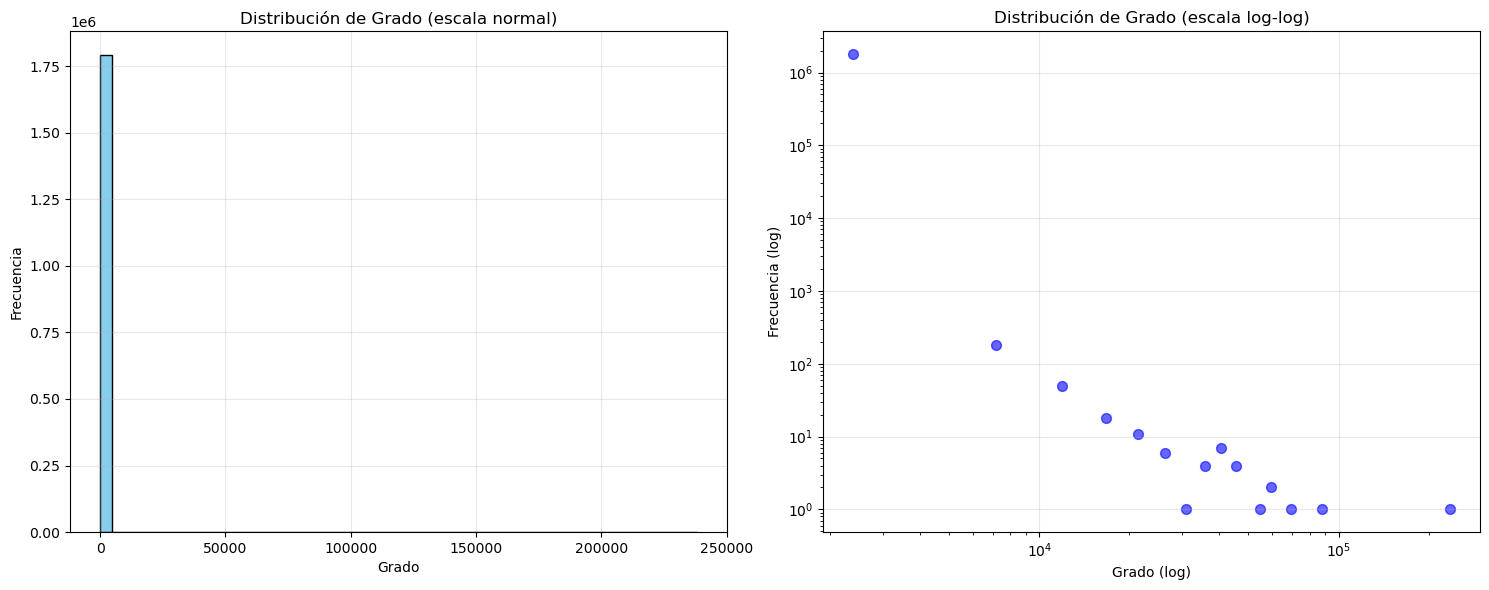

In [ ]:
# Descripción y Carga inicial de Datos y librerías
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

try:
    # Cargar el dataset
    df = pd.read_csv('wiki-topcats.txt', sep=r'\s+', header=None, names=['source', 'target'])
    
    # 1. Análisis básico de la red
    print("=== Análisis de la Red ===\n")
    num_enlaces = len(df)
    num_nodos = len(set(df['source']).union(set(df['target'])))
    print(f"Número total de enlaces (conexiones entre páginas): {num_enlaces:,}")
    print(f"Número total de nodos (páginas únicas de Wikipedia): {num_nodos:,}")
    
    # 2. Análisis de conectividad y estructura
    G = nx.from_pandas_edgelist(df, 'source', 'target')
    
    # Métricas básicas
    print("\n=== Métricas de la Red ===")
    print(f"Tipo de red: {'Dirigida' if G.is_directed() else 'No dirigida'} (No dirigida significa que los enlaces son bidireccionales)")
    densidad = nx.density(G)
    print(f"Densidad: {densidad:.6f} (Porcentaje de conexiones existentes del total posible: {densidad*100:.4f}%)")
    
    # 3. Análisis de grado
    grados = dict(G.degree())
    grado_promedio = sum(grados.values()) / len(grados)
    grado_max = max(grados.values())
    grado_min = min(grados.values())
    
    print("\n=== Estadísticas de Grado (número de conexiones por página) ===")
    print(f"Grado promedio: {grado_promedio:.2f} enlaces por página")
    print(f"Grado máximo: {grado_max} (página más conectada)")
    print(f"Grado mínimo: {grado_min} (página menos conectada)")

    # Análisis de componentes y estructura
    print("\n=== Análisis de Componentes (grupos conectados) ===")
    num_componentes = nx.number_connected_components(G)
    componente_gigante = max(nx.connected_components(G), key=len)
    tam_componente_gigante = len(componente_gigante)
    porcentaje_gigante = (tam_componente_gigante/G.number_of_nodes())*100
    
    print(f"Número de componentes conectados: {num_componentes}")
    print(f"Tamaño de la componente gigante: {tam_componente_gigante:,} páginas")
    print(f"Porcentaje de páginas en la componente gigante: {porcentaje_gigante:.2f}%")
    if porcentaje_gigante == 100:
        print("Interpretación: Todas las páginas están conectadas entre sí, formando una única red navegable.")
    else:
        print(f"Interpretación: El {porcentaje_gigante:.2f}% de las páginas forman un grupo conectado principal.")
    
    # 4. Visualización de la distribución de grado
    degrees = [d for n, d in G.degree()]
    
    # Crear figura con dos subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Histograma normal
    ax1.hist(degrees, bins=50, color='skyblue', edgecolor='black')
    ax1.set_title('Distribución de Grado (escala normal)')
    ax1.set_xlabel('Grado (número de enlaces)')
    ax1.set_ylabel('Frecuencia (número de páginas)')
    ax1.grid(True, alpha=0.3)
    
    # Histograma log-log
    # Calcular el histograma
    hist, bins = np.histogram(degrees, bins=50)
    centers = (bins[:-1] + bins[1:]) / 2
    
    # Filtrar valores mayores que 0 para la escala log
    mask = hist > 0
    ax2.scatter(centers[mask], hist[mask], color='blue', alpha=0.6, s=50)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.set_title('Distribución de Grado (escala log-log)')
    ax2.set_xlabel('Grado (log)')
    ax2.set_ylabel('Frecuencia (log)')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Error: No se encontró el archivo wiki-topcats.txt")
except Exception as e:
    print(f"Error al analizar el dataset: {str(e)}")

In [ ]:
# Análisis del tipo de red y características avanzadas
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Configurar el tamaño de la muestra (5% de los nodos)
    tamano_total = G.number_of_nodes()
    porcentaje_muestra = 0.05  # 5% de los nodos
    cantidad_nodos_muestra = int(tamano_total * porcentaje_muestra)
    print(f"\n=== Configuración de la Muestra ===")
    print(f"Tamaño total de la red: {tamano_total:,} nodos")
    print(f"Tamaño de la muestra: {cantidad_nodos_muestra:,} nodos ({porcentaje_muestra*100}% del total)")
    
    # Usar muestreo estratificado por grado para mejor representatividad
    grados = dict(G.degree())
    nodos_ordenados = sorted(grados.items(), key=lambda x: x[1], reverse=True)
    
    # Tomar una mezcla de nodos de alto, medio y bajo grado
    alto_grado = [n for n, _ in nodos_ordenados[:cantidad_nodos_muestra//3]]
    medio_grado = [n for n, _ in nodos_ordenados[len(nodos_ordenados)//2:len(nodos_ordenados)//2 + cantidad_nodos_muestra//3]]
    bajo_grado = [n for n, _ in nodos_ordenados[-cantidad_nodos_muestra//3:]]
    
    nodos_muestra = alto_grado + medio_grado + bajo_grado
    G_muestra = G.subgraph(nodos_muestra)
    
    print(f"\nDistribución de la muestra:")
    print(f"- Nodos de alto grado: {len(alto_grado):,}")
    print(f"- Nodos de grado medio: {len(medio_grado):,}")
    print(f"- Nodos de bajo grado: {len(bajo_grado):,}")

    print("\n=== Análisis de Clustering ===")
    try:
        coef_clustering = nx.average_clustering(G_muestra)
        print(f"Coeficiente de clustering promedio (muestra): {coef_clustering:.4f}")
        print("Interpretación: Mide qué tan agrupados están los nodos (0=sin agrupamiento, 1=máximo agrupamiento)")
    except Exception as e:
        print("No se pudo calcular el clustering:", str(e))

    print("\n=== Análisis de Centralidad ===")
    try:
        # Calcular betweenness centrality en la muestra
        print("Calculando centralidad de intermediación...")
        betweenness = nx.betweenness_centrality(G_muestra)
        max_betweenness = max(betweenness.items(), key=lambda x: x[1])
        print(f"Nodo con mayor centralidad de intermediación: {max_betweenness[0]}")
        print(f"Valor de centralidad: {max_betweenness[1]:.4f}")
        print("Interpretación: Este nodo es importante como 'puente' entre diferentes partes de la red")
        
        # Validación de la muestra
        print("\n=== Validación de la Muestra ===")
        densidad_muestra = nx.density(G_muestra)
        densidad_original = nx.density(G)
        print(f"Densidad en muestra vs. original: {densidad_muestra:.6f} vs {densidad_original:.6f}")
        print(f"Diferencia relativa: {abs(densidad_muestra-densidad_original)/densidad_original*100:.2f}%")
        
    except Exception as e:
        print("Error en el análisis de centralidad:", str(e))

except Exception as e:
    print(f"Error en el análisis avanzado: {str(e)}")


=== Configuración de la Muestra ===
Tamaño total de la red: 1,791,489 nodos
Tamaño de la muestra: 89,574 nodos (5.0% del total)

Distribución de la muestra:
- Nodos de alto grado: 29,858
- Nodos de grado medio: 29,858
- Nodos de bajo grado: 29,858

=== Análisis de Clustering ===

Distribución de la muestra:
- Nodos de alto grado: 29,858
- Nodos de grado medio: 29,858
- Nodos de bajo grado: 29,858

=== Análisis de Clustering ===


## 1.3 Preparación de Datos
* Limpieza de datos
  - Eliminación de duplicados
  - Manejo de valores faltantes
  - Corrección de formatos
* Normalización
  - Estandarización de identificadores
  - Conversión de tipos de datos
  - Unificación de formatos
* Validación
  - Verificación de integridad
  - Control de consistencia
  - Detección de anomalías

**Nota**: En esta sección implementaremos:
* Lectura y validación de datos
* Limpieza y normalización
* Creación de estructura de grafo
* Verificación de integridad

In [ ]:
# Preparación y limpieza inicial del dataset
import pandas as pd
import networkx as nx
import numpy as np

def preparar_datos(archivo):
    try:
        # 1. Carga inicial
        print("=== Cargando y limpiando datos ===")
        df = pd.read_csv(archivo, sep=r'\s+', header=None, names=['source', 'target'])
        print(f"Registros originales: {len(df)}")
        
        # 2. Limpieza básica
        # Eliminar duplicados
        df_clean = df.drop_duplicates()
        print(f"Registros después de eliminar duplicados: {len(df_clean)}")
        
        # Eliminar self-loops
        df_clean = df_clean[df_clean['source'] != df_clean['target']]
        print(f"Registros después de eliminar self-loops: {len(df_clean)}")
        
        # 3. Validación de datos
        # Verificar valores nulos o vacíos
        nulos = df_clean.isnull().sum()
        if nulos.any():
            print("\nValores nulos encontrados:")
            print(nulos)
            df_clean = df_clean.dropna()
            print(f"Registros después de eliminar nulos: {len(df_clean)}")
        
        # 4. Crear grafo limpio
        G_clean = nx.from_pandas_edgelist(df_clean, 'source', 'target')
        
        # 5. Estadísticas de limpieza
        print("\n=== Estadísticas después de limpieza ===")
        print(f"Nodos: {G_clean.number_of_nodes():,}")
        print(f"Enlaces: {G_clean.number_of_edges():,}")
        print(f"Densidad: {nx.density(G_clean):.6f}")
        
        return df_clean, G_clean
        
    except Exception as e:
        print(f"Error en la preparación de datos: {str(e)}")
        return None, None

# Ejecutar preparación
df_limpio, G_limpio = preparar_datos('wiki-topcats.txt')

## 1.4 Estrategias de Muestreo
* Muestreo de nodos
  - Selección aleatoria
  - Muestreo estratificado
  - Basado en grado
* Muestreo de enlaces
  - Selección aleatoria de enlaces
  - Preservación de comunidades
  - Muestreo por inducción
* Control de calidad
  - Tamaño de muestra
  - Preservación de propiedades
  - Validación estadística

**Nota**: En esta sección implementaremos:
* Técnicas de muestreo
* Validación de la muestra
* Análisis comparativo
* Almacenamiento eficiente

In [ ]:
# Funciones avanzadas de muestreo
import random
import networkx as nx

## Variables para trabajar 
df_limpio, G_limpio 

def random_node_sample(G, sample_size, seed=None):
    """Muestreo aleatorio de nodos"""
    if seed:
        random.seed(seed)
    nodes = list(G.nodes())
    sampled_nodes = random.sample(nodes, min(sample_size, len(nodes)))
    return G.subgraph(sampled_nodes).copy()

def degree_based_sample(G, sample_size, method='top', seed=None):
    """Muestreo basado en grado (top/bottom/random weighted)"""
    if seed:
        random.seed(seed)
    
    degrees = dict(G.degree())
    if method == 'top':
        # Tomar los nodos de mayor grado
        nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
        sampled_nodes = [n for n, _ in nodes[:sample_size]]
    elif method == 'bottom':
        # Tomar los nodos de menor grado
        nodes = sorted(degrees.items(), key=lambda x: x[1])
        sampled_nodes = [n for n, _ in nodes[:sample_size]]
    else:
        # Muestreo ponderado por grado
        total_degree = sum(degrees.values())
        weights = [d/total_degree for d in degrees.values()]
        sampled_nodes = random.choices(list(degrees.keys()), 
                                     weights=weights, 
                                     k=min(sample_size, len(G)))
    
    return G.subgraph(sampled_nodes).copy()

def edge_based_sample(G, sample_size, method='random', seed=None):
    """Muestreo basado en enlaces"""
    if seed:
        random.seed(seed)
    
    edges = list(G.edges())
    if method == 'random':
        # Muestreo aleatorio de enlaces
        sampled_edges = random.sample(edges, min(sample_size, len(edges)))
    else:
        # Muestreo por inducción (preserva estructura local)
        sampled_edges = []
        current_edges = set(random.sample(edges, 1))
        while len(sampled_edges) < sample_size and current_edges:
            edge = current_edges.pop()
            sampled_edges.append(edge)
            # Agregar enlaces adyacentes
            u, v = edge
            current_edges.update(set(G.edges(u)) | set(G.edges(v)) - set(sampled_edges))
    
    # Construir subgrafo con los enlaces muestreados
    H = nx.Graph()
    H.add_edges_from(sampled_edges)
    return H

def validate_sample(G_original, G_sample, metrics=None):
    """Valida la calidad de la muestra comparando métricas"""
    if metrics is None:
        metrics = ['density', 'clustering', 'degree_distribution']
    
    results = {}
    
    if 'density' in metrics:
        results['density'] = {
            'original': nx.density(G_original),
            'sample': nx.density(G_sample)
        }
    
    if 'clustering' in metrics:
        results['clustering'] = {
            'original': nx.average_clustering(G_original),
            'sample': nx.average_clustering(G_sample)
        }
    
    if 'degree_distribution' in metrics:
        orig_degrees = [d for _, d in G_original.degree()]
        sample_degrees = [d for _, d in G_sample.degree()]
        results['avg_degree'] = {
            'original': sum(orig_degrees) / len(orig_degrees),
            'sample': sum(sample_degrees) / len(sample_degrees)
        }
    
    return results

# 2. Análisis de Estructura de Red

## 2.1 Métricas Básicas
* Densidad de la red
* Distribución de grado
* Coeficiente de clustering
* Longitud de camino promedio

## 2.2 Medidas de Centralidad
* Centralidad de grado
* Centralidad de intermediación
* Centralidad de cercanía
* Centralidad de eigenvector

## 2.3 Propiedades Estructurales
* Componentes conectados
* Puentes y puntos de articulación
* Triángulos y coeficientes locales
* Patrones de conectividad

**Nota**: En esta sección implementaremos:
* Cálculo de métricas básicas
* Análisis de centralidad
* Visualización de distribuciones
* Identificación de estructuras clave

In [ ]:
# Métricas básicas y centralidad (muestra)
import statistics
from collections import Counter


if 'G' not in globals() or G is None or G.number_of_nodes() == 0:
    print('Ejecuta la celda de carga de datos primero.')
else:
    n = G.number_of_nodes(); m = G.number_of_edges()
    print(f'Nodos={n} Aristas={m}')

    # Grado
    degrees = [d for _, d in G.degree()]
    print('Grado: min', min(degrees), 'max', max(degrees), 'mean', round(statistics.mean(degrees), 2))

    # Densidad
    print('Densidad:', nx.density(G))

    # Clustering
    try:
        clustering_vals = nx.clustering(G)
        print('Clustering medio:', round(statistics.mean(clustering_vals.values()), 4))
    except Exception:
        print('Error calculando clustering (grafo dirigido o muy grande)')

    # Componentes
    comps = sorted(nx.connected_components(G), key=len, reverse=True)
    print('Número de componentes:', len(comps))
    print('Tamaño de la componente gigante:', len(comps[0]) if comps else 0)

    # Triángulos (local)
    try:
        tri = nx.triangles(G)
        print('Número total de triángulos (sum/3):', sum(tri.values()) // 3)
    except Exception:
        pass

    # Centralidades (rápido: grado; aproximado: betweenness con k)
    deg_cent = nx.degree_centrality(G)
    top_deg = sorted(deg_cent.items(), key=lambda x: x[1], reverse=True)[:10]
    print('\nTop 10 nodos por centralidad de grado:')
    for node, val in top_deg:
        print(node, round(val, 4))

    try:
        # k se ajusta para aproximar si el grafo es grande
        k = 200 if n > 5000 else None
        bet = nx.betweenness_centrality(G, k=k)
        top_bet = sorted(bet.items(), key=lambda x: x[1], reverse=True)[:10]
        print('\nTop 10 nodos por betweenness (aprox):')
        for node, val in top_bet:
            print(node, round(val, 4))
    except Exception as e:
        print('Betweenness skipped or failed:', e)

    # Histograma de grado si matplotlib disponible
    try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(6, 4))
        plt.hist(degrees, bins=50, color='#3c8dbc')
        plt.xlabel('Grado')
        plt.ylabel('Frecuencia')
        plt.title('Distribución de grado (muestra)')
        plt.show()
    except Exception as e:
        print('No se pudo graficar distribución de grado:', e)

# 3. Métodos de Detección de Comunidades

## 3.1 Algoritmos Fundamentales
* Método de Louvain
* Algoritmo de Girvan-Newman
* Propagación de Etiquetas
* Optimización de Modularidad

## 3.2 Características de Algoritmos
* Complejidad computacional
* Escalabilidad
* Resolución límite
* Ventajas y limitaciones

## 3.3 Selección de Método
* Criterios de selección
* Tamaño de la red
* Tipo de comunidades esperadas
* Recursos computacionales

**Nota**: En esta sección implementaremos:
* Algoritmos de detección
* Comparación de resultados
* Análisis de rendimiento
* Visualización de comunidades

In [ ]:
# Detección de comunidades: Louvain, Label Propagation y demo Girvan-Newman
from collections import Counter


if 'G' not in globals() or G is None or G.number_of_nodes() == 0:
    print('Ejecuta la celda de carga de datos primero.')
else:
    partition = None
    # Louvain (recomendado)
    try:
        import community as community_louvain
        partition = community_louvain.best_partition(G)
        counts = Counter(partition.values())
        print('Comunidades detectadas (Louvain):', len(counts))
        print('Top 5 comunidades (Louvain):', counts.most_common(5))
    except Exception as e:
        print('python-louvain no disponible o falló:', e)
        partition = None

    # Label Propagation (rápido, sin dependencias externas)
    try:
        from networkx.algorithms.community import label_propagation
        lp_comms = list(label_propagation.label_propagation_communities(G))
        print('Comunidades (Label Propagation) detectadas:', len(lp_comms))
    except Exception as e:
        print('Label Propagation falló:', e)

    # Girvan-Newman demo en subgrafo pequeño (solo ilustrativo)
    try:
        from networkx.algorithms import community as nx_comm
        nodes_small = list(sorted(G.nodes(), key=lambda n: G.degree(n), reverse=True))[:300]
        G_small = G.subgraph(nodes_small).copy()
        comp_gen = nx_comm.girvan_newman(G_small)
        top = tuple(sorted(c) for c in next(comp_gen))
        print('Demo Girvan-Newman (subgrafo 300 nodos): comunidades en primer corte =', len(top))
    except Exception as e:
        print('Girvan-Newman demo falló:', e)

    # leave partition in globals for later cells
    if partition:
        print('Partition dictionary available as `partition` (node -> community)')
    else:
        print('No partition available from Louvain; consider installing python-louvain if deseas esa partición.')

# 4. Visualización de Comunidades

Técnicas efectivas para visualizar y comprender las estructuras comunitarias:

## 4.1 Técnicas de Visualización
* Layouts de fuerza dirigida
* Visualización jerárquica
* Mapas de calor
* Representaciones circulares

## 4.2 Estrategias de Diseño
* Codificación por colores
* Agrupamiento visual
* Escalado de nodos
* Filtrado interactivo

## 4.3 Interpretación Visual
* Patrones estructurales
* Roles de nodos
* Conexiones entre comunidades
* Anomalías y casos especiales

**Nota**: En esta sección implementaremos:
* Creación de visualizaciones
* Personalización de layouts
* Interactividad
* Exportación de gráficos

In [ ]:
# Visualización por comunidad (usa `partition` si está disponible)
import matplotlib.pyplot as plt
import math

if 'G' not in globals() or G is None or G.number_of_nodes() == 0:
    print('Ejecuta la celda de carga de datos primero.')
else:
    # Determinar mapa de comunidades
    if 'partition' in globals() and partition:
        comm_map = partition
    else:
        # fallback: cada componente es su propia 'comunidad'
        comm_map = {n: i for i, comp in enumerate(nx.connected_components(G)) for n in comp}

    # Seleccionar la componente gigante para visualizar
    largest_cc = max(nx.connected_components(G), key=len)
    Gv = G.subgraph(largest_cc).copy()

    # Recalcular comm_map limitado a Gv
    nodes = list(Gv.nodes())
    unique_comms = sorted({comm_map.get(n, 0) for n in nodes})
    cmap = plt.cm.get_cmap('tab20', max(1, len(unique_comms)))
    color_list = [cmap(unique_comms.index(comm_map.get(n, 0))) for n in nodes]

    pos = nx.spring_layout(Gv, seed=42, k=0.1, iterations=50)
    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(Gv, pos, node_size=20, node_color=color_list)
    nx.draw_networkx_edges(Gv, pos, alpha=0.2, width=0.4)
    plt.title('Componente gigante coloreada por comunidad')
    plt.axis('off')
    plt.show()

    # Mostrar tamaños de comunidades en la componente gigante
    size_by_comm = Counter(comm_map.get(n, 0) for n in nodes)
    print('Comunidades en la componente gigante (top 10):', size_by_comm.most_common(10))

# 5. Métricas y Evaluación de Comunidades

Métodos para evaluar la calidad de las comunidades detectadas:

## 5.1 Métricas de Calidad
* Modularidad
* Conductancia
* Cobertura
* Rendimiento

## 5.2 Evaluación Interna
* Densidad intra-comunidad
* Dispersión inter-comunidad
* Cohesión
* Separación

## 5.3 Evaluación Externa
* Ground truth comparación
* Índice de Rand ajustado
* Información mutua normalizada
* F-measure

**Nota**: En esta sección implementaremos:
* Cálculo de métricas
* Comparación de resultados
* Validación de comunidades
* Visualización de métricas

In [ ]:
# Evaluación de comunidades: modularidad, conductancia y métricas externas si hay ground truth
from collections import defaultdict

def conductance(G, community_nodes):
    cut = 0
    volS = 0
    for u in community_nodes:
        volS += G.degree(u)
        for v in G.neighbors(u):
            if v not in community_nodes:
                cut += 1
    vol_rest = sum(dict(G.degree()).values()) - volS
    denom = min(volS, vol_rest) if min(volS, vol_rest) > 0 else 1
    return cut / denom

if 'partition' in globals() and partition:
    try:
        import community as community_louvain
        mod = community_louvain.modularity(partition, G)
        print('Modularidad (Louvain):', round(mod, 4))
    except Exception as e:
        print('No se pudo calcular modularidad (python-louvain):', e)

    # Conductance for top communities
    comms = defaultdict(list)
    for n, c in partition.items():
        comms[c].append(n)
    top = sorted(comms.items(), key=lambda x: len(x[1]), reverse=True)[:3]
    for cid, nodes in top:
        print(f'Conductancia comunidad {cid} (tam={len(nodes)}):', round(conductance(G, set(nodes)), 4))

else:
    print('No hay partición disponible para evaluación. Ejecuta la celda de detección de comunidades.')

# Evaluación externa si hay ground truth en dict `true_labels` (node -> label)
try:
    from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
    if 'true_labels' in globals() and 'partition' in globals() and partition:
        nodes_common = [n for n in G.nodes() if n in true_labels and n in partition]
        y_true = [true_labels[n] for n in nodes_common]
        y_pred = [partition[n] for n in nodes_common]
        print('NMI:', round(normalized_mutual_info_score(y_true, y_pred), 4))
        print('ARI:', round(adjusted_rand_score(y_true, y_pred), 4))
except Exception as e:
    # sklearn puede no estar instalado o no haber ground truth
    pass

## 6.1 Dinámica de Comunidades
* Nacimiento y muerte
* Fusión y división
* Crecimiento y contracción
* Estabilidad y cambio

## 6.2 Métricas Temporales
* Supervivencia de comunidades
* Tasa de cambio
* Persistencia de membresía
* Evolución estructural

## 6.3 Patrones de Evolución
* Ciclos de vida
* Puntos de transición
* Factores de cambio
* Predicción de evolución

**Nota**: En esta sección implementaremos:
* Análisis de series temporales
* Tracking de comunidades
* Visualización de evolución
* Predicción de cambios

---

## Conclusión
Este notebook servirá como guía para el análisis de comunidades en redes, con implementaciones prácticas, ejemplos y visualizaciones.

In [ ]:
# Ejemplo simple de slicing temporal (si hay timestamps en columna 3)
from collections import defaultdict

def slice_windows(path, window_size=86400, max_lines=None):
    windows = defaultdict(list)
    with open(path, 'r', encoding='utf-8', errors='ignore') as f:
        for i, line in enumerate(f):
            if max_lines and i>=max_lines: break
            parts = line.strip().split()
            if len(parts) < 3:
                if len(parts) >= 2:
                    windows[0].append((parts[0], parts[1]))
                continue
            try:
                t = int(parts[2])
            except:
                continue
            win = (t//window_size)*window_size
            windows[win].append((parts[0], parts[1]))
    return windows

print('Si tu edgelist incluye timestamps, usa slice_windows para crear snapshots por ventana.')